# Homework

In [1]:
%matplotlib inline

### Download MNIST data set
do this only once

```bash
    sudo apt install curl
    pip3 install --user mlxtend sklearn numpy matplotlib
    curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
    curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
    gunzip t*-ubyte.gz
```

In [2]:
 #!pip3 install --user mlxtend sklearn numpy matplotlib
 #!curl -O http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
 #!curl -O http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
 #!gunzip t*-ubyte.gz

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from mlxtend.data import loadlocal_mnist

import solution

np.random.seed(42)

### Load dataset

In [4]:
X, y = loadlocal_mnist(
        images_path='./train-images-idx3-ubyte', 
        labels_path='./train-labels-idx1-ubyte')

In [5]:
X.shape, y.shape

((60000, 784), (60000,))

### We have to decide whether number is 3 or 1

In [6]:
X, y = np.concatenate([X[y == 3], X[y==1]]), np.concatenate([np.full(y[y == 3].shape, 0), np.full(y[y == 1].shape, 1)])

In [7]:
X.shape, y.shape
X[0].shape

(784,)

### Sample of MNIST dataset

Number:  3


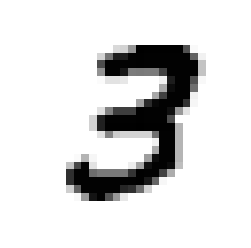

In [10]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
print("Number: ", 3 if y[0] == 0 else 1)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# Your turn!
Preprocess data, build model and train it. Feel free to use everything you know :)

Use notebook from logistic regression as cheat sheet

**Hint:** Order of tasks:
 - analize dataset **perhaps we need to normalize data**
 - validate dataset **do we need this?**
 - define squashing function **I recommend you to use sigmoid**
 - define loss, gradient descent 
 - train your model :)

In [16]:
# Type your code here

X_train, X_val_test, y_train, y_val_test = train_test_split(X.astype(np.float), y, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.66)

In [17]:
X_train.dtype

dtype('float64')

In [18]:
X_train /= 255.0
X_val /= 255.0
X_test /= 255.0

### Check your models accuracy and f1 score
y_hat should have shape (2873,) sometimes you have to transpose the results!

In [ ]:
accuracy_score(y_test, y_hat)

In [ ]:
f1_score(y_test, y_hat)

### Compare your model with my

0.6395407764864396
0.6309879886509234
0.6239854422436025
0.6165377295368373
0.6083613841321197
0.598906656029774
0.5881273395638505
0.5754468288587979
0.5598423853316402
0.5393796086830559
0.5074553117420685
0.45645368964434
0.4218641699898654
0.3934165456781513
0.37670843951283683
0.39116102412773274
0.948784807659601
1.8104994463043507
0.7877734485805692
0.47491291523695456
0.4062847688245257
0.37651766798953484
0.36030130620198964
0.34870104436088994
0.3388199270654959
0.3296747027300627
0.321088790377221
0.312842844193889
0.30485153751189936
0.29710692470314687
0.28945966929939515
0.28184138886877
0.2743087432611331
0.2671175915217642
0.2601167630251095
0.2531766101817553
0.24642252234818585
0.2398635585592697
0.2335275628509471
0.22725003166199384
0.2211043891450358
0.21514479035168368
0.2093122476997678
0.20361711380796882
0.19810038691959234
0.19275049959503815
0.18751690779253244
0.18248318889681178
0.17761673227663133
0.17292859654843945
0.168444226615406
0.16408364289545863
0

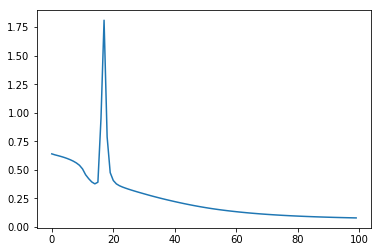

In [10]:
predict = solution.forward_propagation

X_train, y_train, X_test, y_test = solution.preprocess(X, y)

model, history = solution.fit(X_train, y_train, 0.1, epochs=100)

y_hat, *_ = solution.forward_propagation(X_test.T, model)

y_hat[y_hat >= 0.5] = 1
y_hat[y_hat < 0.5] = 0

plt.plot(history)
plt.show()

In [11]:
accuracy_score(y_test, y_hat.T)

0.9860772711451444

In [12]:
f1_score(y_test, y_hat.T)

0.9929898352611286